# Génération de figures pour le chapitre Bonnes Pratiques

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rc('font', **{'family':'sans', 'size': 18})

In [3]:
prop_cycle = plt.rcParams['axes.prop_cycle']
def_colors = prop_cycle.by_key()['color']

In [4]:
import scipy.stats as st

In [17]:
import pandas as pd

### Bar plot

In [7]:
yyy = [0.70, 0.72, 0.69, 0.73]

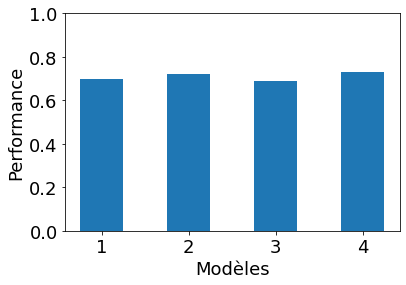

In [15]:
plt.bar(range(len(yyy)), yyy, width=0.5, tick_label=['1', '2', '3', '4'])
plt.xlabel("Modèles")
plt.ylabel("Performance")
plt.ylim(0., 1.)
plt.savefig('../poly/figures/pratiques/bars_start_zero.pdf', bbox_inches='tight')

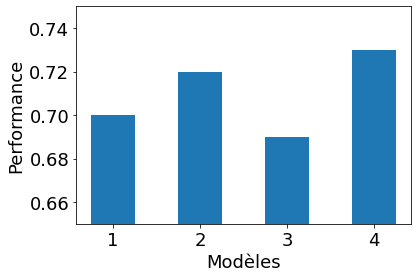

In [14]:
plt.bar(range(len(yyy)), yyy, width=0.5, tick_label=['1', '2', '3', '4'])
plt.xlabel("Modèles")
plt.ylabel("Performance")
plt.ylim(0.65, 0.75)
plt.savefig('../poly/figures/pratiques/bars_start_nonzero.pdf', bbox_inches='tight')

### Line plots

In [18]:
meteo = pd.read_csv('../data/meteo_data.csv')

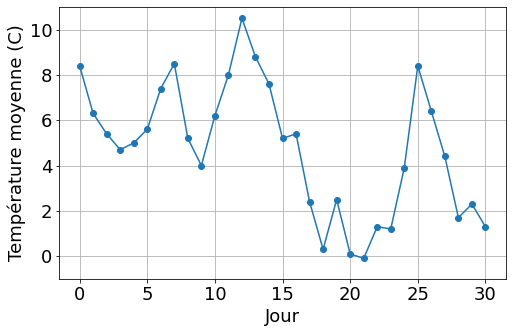

In [40]:
fig = plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(meteo.t_moy)), meteo.t_moy, 'o-')
plt.ylim(-1, 11)
plt.xlabel("Jour")
plt.ylabel("Température moyenne (C)")
plt.grid()
plt.savefig('../poly/figures/pratiques/line_start_nonzero.pdf', bbox_inches='tight')

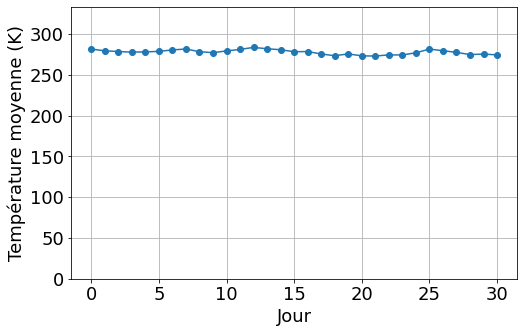

In [39]:
fig = plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(meteo.t_moy)), meteo.t_moy+273.15, 'o-')
plt.ylim(0, (60+273.15))
plt.xlabel("Jour")
plt.ylabel("Température moyenne (K)")
plt.grid()
plt.savefig('../poly/figures/pratiques/line_start_zero.pdf', bbox_inches='tight')

### Proportional ink 

In [79]:
xxx = np.array([0.22, 0.24, 0.11, 0.10, 0.18, 0.08, 0.05, 0.02])

In [80]:
np.sum(xxx)

1.0

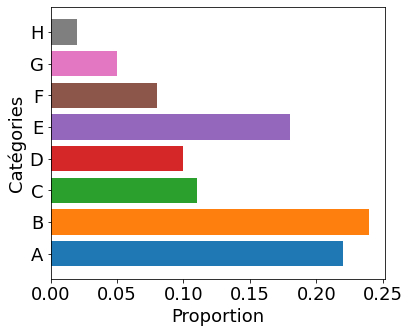

In [120]:
fig = plt.figure(figsize=(6, 5))
plt.barh(np.arange(len(xxx)), xxx, height=0.8, tick_label=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], color=def_colors[:8])
plt.ylabel("Catégories")
plt.xlabel("Proportion")
#plt.ylim(0., .3)
plt.savefig('../poly/figures/pratiques/areas_bars.pdf', bbox_inches='tight')

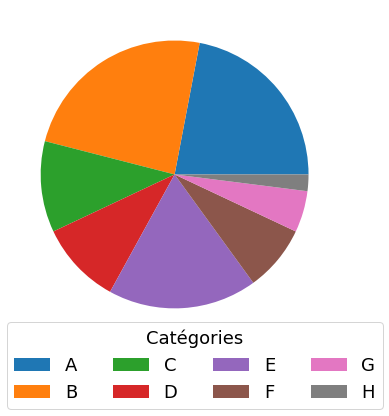

In [144]:
fig = plt.figure(figsize=(6, 8))
wedges, txt, autotxt = plt.pie(xxx, autopct='')
plt.legend(wedges, ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], loc=(0.0, -0.2),title="Catégories", ncol=4)
#plt.xlabel("Valeurs")
#plt.ylabel("Proportion")
#plt.ylim(0., .3)
plt.savefig('../poly/figures/pratiques/areas_pie.pdf', bbox_inches='tight')

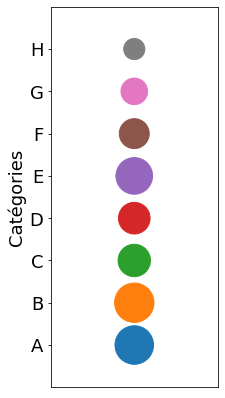

In [126]:
fig = plt.figure(figsize=(3, 7))
t=plt.scatter([1 for x in range(len(xxx))], range(len(xxx)), c=def_colors[:len(xxx)], s=np.sqrt(10000000*xxx))
plt.ylabel("Catégories")
plt.yticks(range(len(xxx)), ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
plt.xticks([])
plt.ylim(-1, 8)
#plt.ylabel("Proportion")
#plt.xlabel("Valeurs")
#plt.ylabel("Proportion")
#plt.ylim(0., .3)
plt.savefig('../poly/figures/pratiques/areas_bubbles.pdf', bbox_inches='tight')